In [43]:
# import lib
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.datasets import make_moons,make_classification,make_regression,make_circles
import sys
from mpl_toolkits.mplot3d import Axes3D 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA,KernelPCA
np.random.seed(23)
np.set_printoptions(precision=3,suppress=True)
plt.style.use('seaborn')

import os
import tensorflow as tf
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
tf.logging.set_verbosity(tf.logging.ERROR)
from tensorflow.examples.tutorials.mnist import input_data

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics

def _sym_decorrelation(W):
    """ Symmetric decorrelation
    i.e. W <- (W * W.T) ^{-1/2} * W
    """
    s, u = np.linalg.eigh(np.dot(W, W.T))
    # u (resp. s) contains the eigenvectors (resp. square roots of
    # the eigenvalues) of W * W.T
    return np.dot(np.dot(u * (1./(np.sqrt(s+1e-8))+1e-8), u.T), W)

In [49]:
# get the data 
digits = datasets.load_digits()
X = digits.images.reshape((digits.images.shape[0],-1))
X = (X-X.mean(1)[:,None])/(X.std(1)[:,None])
Y = digits.target

print(X.shape,X.max(),X.min())
print(Y.shape,Y.max(),Y.min())
colors = ['red','green','blue','purple','white','yellow','black','lightblue','pink']
cdict  = {0: 'red', 1: 'blue', 2: 'green',3: 'green',4: 'green',
         5: 'green',6: 'green',7: 'green',8: 'green',9: 'green'}

(1797, 64) 2.4424196817327575 -1.019574787389169
(1797,) 9 0


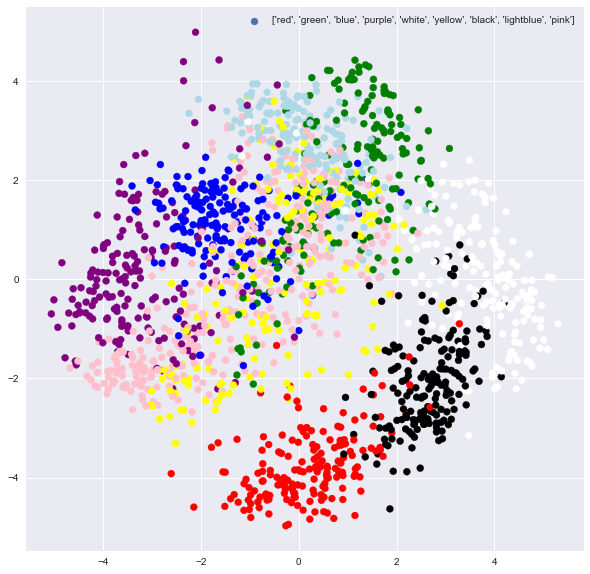

(1797, 2)


In [48]:
# traditional pca 
pca_data = PCA(2).fit_transform(X)

plt.figure(figsize=(10,10))
fig, ax = plt.subplots()
for class_label in Y:
    ix = np.where(Y == class_label)
    ax.scatter(pca_data[ix], pca_data[ix], c = cdict[g], label = Y, s = 100)
ax.legend()
plt.show()



print(pca_data.shape)

In [15]:
for x in range(10):
    print( (digits.target==x).sum())

178
182
177
183
181
182
181
179
174
180
